In [134]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.model_selection import train_test_split


In [135]:
from sklearn import datasets, linear_model
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import requests


In [136]:
#Reading the data
target_url = 'http://users.stat.ufl.edu/~winner/data/airq402.dat'
response = requests.get(target_url)
data_dat = response.text
data_list = data_dat.splitlines() 
data_content = [e.split() for e in data_list]



In [137]:
#Column names for the data are:
cols = ['City1', 'City2', 'Average Fare', 'Distance', 'Average weekly passengers',
                   'market leading airline', 'market share', 'Average fare', 'Low price airline',
                   'market share', 'price']

In [138]:
4.	Check for outliers. Do outlier treatment.
5.	Dummy treatment for categorical columns.
6.	Split train and test.


SyntaxError: invalid syntax (<ipython-input-138-a14681e4e6d3>, line 1)

#### Here we need to change the column names into a more readable dataset.As they contained spaces,they could not be read.Hence they had to be converted to readable names by Python

In [ ]:
airfare=pd.DataFrame(data_content,columns=['City1', 'City2', 'Average_Fare', 'Distance', 'Average_weekly_passengers',
                   'market_leading_airline', 'market_share1', 'Average_fare1', 'Low_price_airline',
                   'market_share2', 'price2'])
airfare.head()


In [ ]:
airfare.describe()

In [ ]:
airfare.info()

In [ ]:
print(type(airfare['Average_Fare']))

In [ ]:
airfare.drop(['Average_fare1'],axis=1,inplace=True)

## 1.	Convert data into appropriate format. [Hint: .split() converts data to string. Use astype(float)]

In [ ]:
airfare['Average_Fare']=airfare['Average_Fare'].astype(float)

In [ ]:
airfare.info()

In [ ]:
airfare.head()

In [ ]:
airfare['Distance']=airfare['Distance'].astype(float)
airfare['Average_weekly_passengers']=airfare['Average_weekly_passengers'].astype(float)
airfare['market_share1']=airfare['market_share1'].astype(float)
#airfare['Average_fare1']=airfare['Average_fare1'].astype(float)
airfare['market_share2']=airfare['market_share2'].astype(float)
airfare['price2']=airfare['price2'].astype(float)

airfare.info()

In [ ]:
airfare.info()

In [ ]:
airfare.head()

#### Here we converted the following-
#### 1) Average_Fare,Distance,Average_weekly_passengers,market_share1,Average_fare1,market_share2,price2 to float as they are predominantly float columns
#### 2)We change the names of similar columns to avoid confusion and demarcate which Fare,marketshare is for which type

## 2.	Separate out the categorical and numerical values. Do EDA separately.

In [ ]:
airfare.info()

In [ ]:
airfare_cat=airfare.select_dtypes(include=['object'])
airfare_cat.head()

#### Categorical Columns

In [ ]:
airfare['City1'].unique()

In [ ]:
airfare['City1'].nunique()

In [ ]:
plt.subplots(figsize=(25,9))
sns.countplot(data=airfare,x='City1')
plt.title('City1')
plt.show()

In [ ]:
print(airfare['City2'].unique())
print(airfare['City2'].nunique())

In [ ]:
plt.subplots(figsize=(25,9))
sns.countplot(data=airfare,x='City2')
plt.title('City2')
plt.show()

In [ ]:

print(airfare['market_leading_airline'].unique())
print(airfare['market_leading_airline'].nunique())

In [ ]:
plt.subplots(figsize=(25,9))
sns.countplot(data=airfare,x='market_leading_airline')
plt.title('market_leading_airline')
plt.show()

In [ ]:
 
print(airfare['Low_price_airline'].unique())
print(airfare['Low_price_airline'].nunique())

In [ ]:
plt.subplots(figsize=(25,9))
sns.countplot(data=airfare,x='Low_price_airline')
plt.title('Low_price_airline')
plt.show()

In [ ]:
sns.barplot(airfare['market_leading_airline'],y=airfare['Average_Fare'])
plt.show()

### Numerical columns

In [ ]:
airfare.info()

In [ ]:
airfare['Average_Fare'].describe()

In [ ]:
sns.boxplot(airfare['Average_Fare'])
plt.title('Average Fare_Target VAriable')
plt.show()

In [ ]:
airfare['Distance'].describe()

In [ ]:
sns.boxplot(airfare['Distance'])
plt.title('Distance')
plt.show()

In [ ]:

airfare['Average_weekly_passengers'].describe()

In [ ]:
sns.boxplot(airfare['Average_weekly_passengers'])
plt.title('Average_weekly_passengers')
plt.show()

In [ ]:
print('Market_share1 details=',airfare['market_share1'].describe())
print('Market_share2 details=',airfare['market_share2'].describe())
#print('Average_Fare1 details=',airfare['Average_fare1'].describe())
print('price2 details=',airfare['price2'].describe())

In [ ]:

sns.boxplot(airfare['market_share1'])
plt.title('Market_share1')
plt.show()

In [ ]:
sns.boxplot(airfare['market_share2'])
plt.title('Market_share2')
plt.show()

In [ ]:
#sns.boxplot(airfare['Average_fare1'])
#plt.title('Average_fare1')
#plt.show()

In [ ]:
sns.boxplot(airfare['price2'])
plt.title('price2')
plt.show()

In [ ]:
sns.heatmap(airfare.corr(),annot=True)
plt.show()

### Distance -Avg Fare- +ve high corr
### Distance -Market share- -ve high Corr
### distance and price strong corr() of 0.58


In [ ]:
airfare_num=airfare.select_dtypes(include=['float64','int64'])

In [ ]:
## Scatter of Numerical cols wrt Target variable Avg fare
for i in range(0,len(airfare_num.columns),6):
    sns.pairplot(data=airfare_num,
                x_vars=airfare_num.columns[i:i+5],
                y_vars=['Average_Fare'])

#### price and distance has strong +ve corr with avg price
#### markest share also has no ouliers.market share does not affect tagert much
#### Weekly passengers don't want high avg fares.They want to travel in low avg fares only
#### Avg Weekly passengers have high outliers

### Observation- In Numerical-AverageFare,Average Weekly passengers,AverageFare1,price2 have high number of outliers.They have to be treated properly.
### Distance is highly correlated with Avg fare
###  Categorical-City1,City2 most values are between few columns only.Also Airlines is dominated by WN & AA

## 3.	Check for missing values.

In [ ]:
airfare.info()

In [ ]:
airfare.isnull().sum()

In [ ]:
airfare.isna().sum()

In [ ]:
airfare['Average_Fare'].value_counts()

#### Missing value Treatment-No null/Missing values found in dataset

## 4.	Check for outliers. Do outlier treatment.

In [ ]:
airfare.info()

In [ ]:
print("Skewness of Average Fare",airfare['Average_Fare'].skew())
print("Skewness of Average Fare",airfare['Average_Fare'].kurt())

In [ ]:
sns.distplot(airfare['Average_Fare'])
plt.show()

In [ ]:
## Right skewed data

In [ ]:
Q1=airfare['Average_Fare'].quantile(0.25)

In [ ]:
Q3=airfare['Average_Fare'].quantile(0.75)

In [ ]:
IQR=Q3-Q1

In [ ]:
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

In [ ]:
airfare.info()

In [ ]:
airfare_num.columns

In [ ]:
## Average_Fare

In [ ]:
Q1=airfare['Average_Fare'].quantile(0.25)
Q3=airfare['Average_Fare'].quantile(0.75)

In [ ]:
IQR=Q3-Q1
IQR

In [ ]:
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

In [ ]:
df=airfare[(airfare['Average_Fare']>LL)&(airfare['Average_Fare']<UL)]

In [ ]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.boxplot(airfare['Average_Fare'],ax=ax[0])
ax[0].set_title('Before Outlier Treatment')
sns.boxplot(df['Average_Fare'],ax=ax[1])
ax[1].set_title('After Outlier Treatment')
plt.show()

In [ ]:
## Average Weekly Passengers

In [ ]:
airfare.columns

In [140]:
Q1=airfare['Average_weekly_passengers'].quantile(0.25)
Q3=airfare['Average_weekly_passengers'].quantile(0.75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR
df=airfare[(airfare['Average_weekly_passengers']>LL)&(airfare['Average_weekly_passengers']<UL)]

In [142]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.boxplot(x=airfare['Average_weekly_passengers'],y=airfare['Average_Fare'],ax=ax[0])
ax[0].set_title('Before Outlier Treatment')
sns.boxplot(x=df['Average_weekly_passengers'],y=df['Average_Fare'],ax=ax[1])
ax[1].set_title('After Outlier Treatment')
plt.show()

In [ ]:
## Price2

In [ ]:
Q1=airfare['price2'].quantile(0.25)
Q3=airfare['price2'].quantile(0.75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR
df=airfare[(airfare['price2']>LL)&(airfare['price2']<UL)]

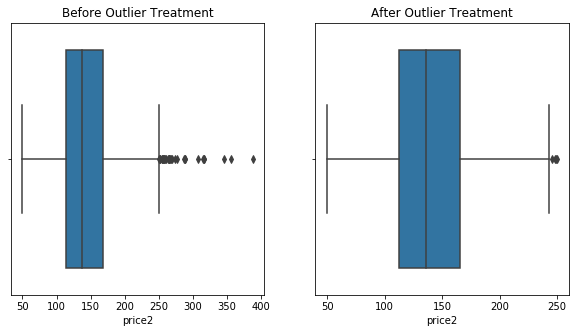

In [139]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.boxplot(airfare['price2'],ax=ax[0])
ax[0].set_title('Before Outlier Treatment')
sns.boxplot(df['price2'],ax=ax[1])
ax[1].set_title('After Outlier Treatment')
plt.show()

## 5.	Dummy treatment for categorical columns.


In [ ]:
airfare.columns

In [ ]:
airfare.drop(['City1','City2'],axis=1,inplace=True)

In [144]:
modeldata=pd.get_dummies(data=airfare,columns=['market_leading_airline','Low_price_airline'],prefix=['MLA','LPA'])
modeldata.head()

,Average_Fare,Distance,Average_weekly_passengers,market_share1,market_share2,price2,MLA_AA,MLA_AS,MLA_B6,MLA_CO,...,LPA_G4,LPA_HP,LPA_NK,LPA_NW,LPA_SY,LPA_TZ,LPA_UA,LPA_US,LPA_WN,LPA_YX
0,114.47,528.0,424.56,70.19,70.19,111.03,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,122.47,860.0,276.84,75.10,17.23,118.94,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,214.42,852.0,215.76,78.89,2.77,167.12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,69.40,288.0,606.84,96.97,96.97,68.86,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,158.13,723.0,313.04,39.79,15.34,145.42,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### Here we see that we have dropped City1,City2 columns.It is Because that the columns have around 85-90 unique values.Hence encoding those many columns increases the dataset to large extent.Hence we dropped it.

## 6.	Split train and test.

In [145]:
x=modeldata.drop(['Average_Fare'],axis=1)
y=modeldata['Average_Fare']

In [146]:
Y_train,Y_test,X_Train,X_test=train_test_split(y,x,train_size=0.7,random_state=0)

In [147]:
Y_train

105    178.55
68     210.45
479    168.21
399    223.28
434    132.14
        ...  
835    283.44
192    148.71
629    185.14
559     81.36
684    166.32
Name: Average_Fare, Length: 700, dtype: float64

In [148]:
Y_test

993    131.47
859    100.92
298    171.88
553    168.80
672    161.93
        ...  
167    170.24
998     73.57
984    237.26
491    210.02
10     212.49
Name: Average_Fare, Length: 300, dtype: float64

In [149]:
X_Train

,Distance,Average_weekly_passengers,market_share1,market_share2,price2,MLA_AA,MLA_AS,MLA_B6,MLA_CO,MLA_DL,...,LPA_G4,LPA_HP,LPA_NK,LPA_NW,LPA_SY,LPA_TZ,LPA_UA,LPA_US,LPA_WN,LPA_YX
105,1238.0,508.04,55.99,26.25,171.96,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
68,1900.0,302.28,51.56,11.29,191.57,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
479,629.0,412.17,67.06,21.17,135.59,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
399,1121.0,530.21,81.44,3.01,181.34,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
434,808.0,228.36,43.21,29.41,130.49,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1587.0,494.56,41.73,14.24,260.25,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
192,1249.0,723.15,77.93,6.35,135.26,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
629,2153.0,232.82,46.45,17.60,173.65,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
559,429.0,203.69,92.90,92.90,77.40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
X_test

,Distance,Average_weekly_passengers,market_share1,market_share2,price2,MLA_AA,MLA_AS,MLA_B6,MLA_CO,MLA_DL,...,LPA_G4,LPA_HP,LPA_NK,LPA_NW,LPA_SY,LPA_TZ,LPA_UA,LPA_US,LPA_WN,LPA_YX
993,1216.0,359.23,73.25,73.25,126.38,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
859,671.0,1762.06,56.25,56.25,98.95,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298,412.0,766.19,49.96,49.96,157.19,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
553,626.0,234.23,28.58,14.70,134.71,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
672,987.0,217.60,43.55,19.13,154.65,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,597.0,249.02,48.31,48.31,157.72,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,174.0,214.45,99.74,99.74,73.44,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
984,2392.0,193.26,21.54,16.02,200.96,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
491,453.0,591.95,57.05,39.47,203.09,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Model Splitting completed.Hence now we have successfully cleaned the data & put the data for use in the ML model

In [ ]:
cols=airfare_num.columns

In [ ]:
cols

In [ ]:
for i in cols:
    print("Skewness of ",i,"=",airfare[i].skew())
    print("Kurtosis of ",i,"=",airfare[i].kurt())
    Q1=airfare[i].quantile(0.25)
    Q3=airfare[i].quantile(0.75)
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    df=airfare[(airfare[i]>LL)&(airfare[i]<UL)]
    print("Skewness of ",i,"=",df[i].skew())
    print("Kurtosis of ",i,"=",df[i].kurt())
    sns.boxplot(df[i])
    plt.show()